<a href="https://colab.research.google.com/github/MdRasel-Hossain/Data-Structure-and-Algorithm/blob/main/ML_09_10_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [ ]:
target_col = 'HeartDisease'

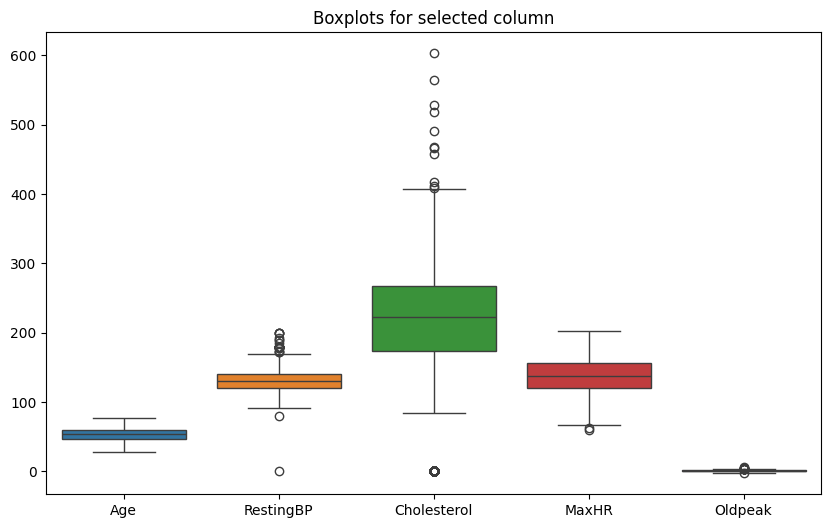

In [ ]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plt.figure(figsize = (10,6))
sns.boxplot(data = df[numeric_cols])
plt.title('Boxplots for selected column')
plt.show()

In [ ]:
col = 'Cholesterol'
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5* iqr
upper = q3 + 1.5* iqr
outliers = df[(df[col]<lower)| (df[col]>upper)]
print(f'Number of detected outlier {col}: ', len(outliers))

Number of detected outlier Cholesterol:  183


In [ ]:
col = 'Oldpeak'
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5* iqr
upper = q3 + 1.5* iqr
outliers = df[(df[col]<lower)| (df[col]>upper)]
print(f'Number of detected outlier {col}: ', len(outliers))

Number of detected outlier Oldpeak:  16


In [ ]:
df_outlier = df[(df[col] >= lower) & (df[col]<=upper)]
df_capped = df.copy()
df_capped[col] = df[col].clip(lower, upper)
df_log = df.copy()
df_log[col + "_log"] = np.log(df_log[col] + 1)
print(len(df_outlier))
print(df_capped)
print(df_log)

902
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172             

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_cols = ['Age', 'MaxHR']
poly = PolynomialFeatures(degree = 2, include_bias = False)
poly_features = poly.fit_transform(df[poly_cols])
poly_features_names = poly.get_feature_names_out(poly_cols)

print(poly_features_names)
print(poly_features.shape)

['Age' 'MaxHR' 'Age^2' 'Age MaxHR' 'MaxHR^2']
(918, 5)


In [ ]:
df['Age_bin'] = pd.cut(df['Age'], bins = [0,30,50,100],
                       labels = ['Young', 'Middle', 'Old'])
print(df[['Age', 'Age_bin']].head(20))

    Age Age_bin
0    40  Middle
1    49  Middle
2    37  Middle
3    48  Middle
4    54     Old
5    39  Middle
6    45  Middle
7    54     Old
8    37  Middle
9    48  Middle
10   37  Middle
11   58     Old
12   39  Middle
13   49  Middle
14   42  Middle
15   54     Old
16   38  Middle
17   43  Middle
18   60     Old
19   36  Middle


In [ ]:
df['Age_bin'] = pd.cut(df['Age'], bins = [0,30,50,70, 100],
                       labels = ['Young', 'Middle','Middle Old', 'Old'])
print(df[['Age', 'Age_bin']].head(20))

    Age     Age_bin
0    40      Middle
1    49      Middle
2    37      Middle
3    48      Middle
4    54  Middle Old
5    39      Middle
6    45      Middle
7    54  Middle Old
8    37      Middle
9    48      Middle
10   37      Middle
11   58  Middle Old
12   39      Middle
13   49      Middle
14   42      Middle
15   54  Middle Old
16   38      Middle
17   43      Middle
18   60  Middle Old
19   36      Middle


In [ ]:
def bp_risk(bp):
  if bp<120:
    return "Normal"
  elif bp<140:
    return "Elevated"
  else:
    return "High"

def oldpeak_risk(op):
  if op==0:
    return "No Stress"
  elif op<2:
    return "Moderate Stress"
  else:
    return "High Stress"

df["BP_Risk"]=df["RestingBP"].apply(bp_risk)
df["Oldpeak_Risk"]=df["Oldpeak"].apply(oldpeak_risk)
df[["RestingBP", "BP_Risk", "Oldpeak","Oldpeak_Risk"]]

,RestingBP,BP_Risk,Oldpeak,Oldpeak_Risk
0,140,High,0.0,No Stress
1,160,High,1.0,Moderate Stress
2,130,Elevated,0.0,No Stress
3,138,Elevated,1.5,Moderate Stress
4,150,High,0.0,No Stress
...,...,...,...,...
913,110,Normal,1.2,Moderate Stress
914,144,High,3.4,High Stress
915,130,Elevated,1.2,Moderate Stress
916,130,Elevated,0.0,No Stress


In [ ]:
df.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_bin,BP_Risk,Oldpeak_Risk
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Middle,High,No Stress


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
cat_features = ['Sex', 'ExerciseAngina', 'ChestPainType', '	RestingECG', 'ST_Slope']

num_pipeline = Pipeline(['scaler', StandardScaler()])
cat_pipeline = Pipeline(['ohe', OneHotEncoder(drop = 'first')])

preprocess = ColumnTransformer([('num', num_pipeline, num_features), ('cat', 'cat_pipeline, cat_features')])


clf = Pipeline([('prep', preprocess), ('model', LogisticRegression(max_iter = 1000))])

In [ ]:
X = df.drop(columns = [target_col])
y = df[target_col]
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(X,y, test_size = 0.25, random_state = 42)
clf.fit(X_train_pipe, y_train_pipe)

y_pred_pipe = clf.predict(X_test_pipe)
acc = accuracy_score(y_test_pipe, y_pred_pipe)
print('Logistic Regression with preprocessing pipeline:', acc)

ValueError: not enough values to unpack (expected 3, got 2)